In [0]:
#check that csv file was successfully imported to DPFS
dbutils.fs.ls("/FileStore/tables/")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1681337703000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677679899000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679498317000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675269708000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.zip', name='clinicaltrial_2019.zip', size=9707871, modificationTime=1678984730000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=463

#Enable Autologging

In [0]:
import mlflow

#enable autologging
mlflow.pyspark.ml.autolog()

#Load data into dataframe

In [0]:
#read the CSV file and create a DataFrame
FaultDataset = spark.read.csv("/FileStore/tables/FaultDataset.csv",
                           header = "true",
                           inferSchema = "true")

#Exploratory data analysis

In [0]:
#Show the first 20 rows of the DataFrame
FaultDataset.show(n=20)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|
|0.5090625| 0.484375| 0.046875| 0.071875|     0.06|0.0634375|   0.0575|0.0546875|0.0559375| 0.058125|0.0628125| 0.065625|0.0640625|0

In [0]:
FaultDataset.display()

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0
0.3590625,0.3609375,0.360625,0.3590625,0.355,0.365,0.355625,0.358125,0.3575,0.3578125,0.355625,0.3584375,0.3521875,0.3459375,0.3521875,0.3509375,0.3525,0.35625,0.353125,0.3540625,0


In [0]:
#print the schema of the DataFrame
FaultDataset.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [0]:
#generate summary statistics for each column
FaultDataset.describe().show(5)

+-------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|                  1|                  2|                  3|                  4|                 5|                 6|                 7|                  8|                  9|                10|                 11|                 12|                 13|                14|                 15|                16|                 17|                 18|                19|                 20|    fault_detected|
+-------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+----------

In [0]:
from pyspark.sql.functions import isnull, when, count, col

#check for missing values in the dataset
FaultDataset.select([count(when(col(c).isNull(), c)).alias(c) for c in FaultDataset.columns]).toPandas().head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from pyspark.sql.functions import count

FaultDataset.groupBy("fault_detected").agg(count("*").alias("occupancy_count")).show()


+--------------+---------------+
|fault_detected|occupancy_count|
+--------------+---------------+
|             1|           4646|
|             0|           4646|
+--------------+---------------+



#Visualize the variables

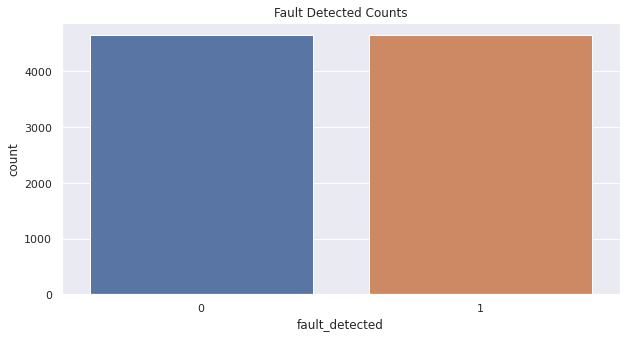

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data and convert to pandas dataframe
FaultDataset1 = FaultDataset.groupby('fault_detected').count().toPandas()

# Create barplot with seaborn
sns.set(rc={'figure.figsize':(10,5)})
xe = sns.barplot(x='fault_detected', y='count', data=FaultDataset1)

# Set title using set() method
xe.set(title='Fault Detected Counts')

# Show plot
plt.show()


#Data preparation and pre-processing

In [0]:
#Transform the dataset using Rformula
from pyspark.ml.feature import RFormula
preprocess = RFormula(formula = "fault_detected ~ .")
FaultDataset = preprocess.fit(FaultDataset).transform(FaultDataset)
FaultDataset.show(5)


2023/04/14 13:02:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '27e9ba4b39874d77bfee94c149f624f8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+
|0.3

In [0]:
#Split the dataset into training and testing sets:
trainingDf, testDf = FaultDataset.randomSplit([0.7, 0.3], seed = 100 )

#Training the model using DecisionTreeClassifier

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

#Create a Decision tree model
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", seed=100)

#Train the model
DTmodel = dt.fit(trainingDf)

2023/04/14 13:02:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '44e678efd9c5494f836076fdaddd9b28', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 13:02:33 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2023/04/14 13:02:37 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 13:03:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


#Test the model

In [0]:
#Make predictions on test dataset
DTpredictions = DTmodel.transform(testDf)
DTpredictions.show()


+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|            features|label| rawPrediction|         probability|prediction|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+--------------------+-----+--------------+--------------------+----------+
|0.0253125| 0.039375|0.0528125| 0.056875|   0.0725| 0.041875|0.5109375|0.5628125|    0.605|   0.6025|0.6259375|      0.6|0.6090

#Evaluate the model

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Evaluate model's performance using accuracy metric
evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol = "prediction", metricName= "accuracy")
accuracy = evaluator.evaluate(DTpredictions)
print("Accuracy =%g" % (accuracy))


Accuracy =0.952432


#Hyperparameter tuning

#Experiment 1 - Decision tree

In [0]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#create a parameter grid
parameters = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [1, 3, 5]) \
    .addGrid(dt.maxBins, [8, 16, 32]) \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit

#Define TrainValidationSplit
tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator (dt)\
.setEvaluator(evaluator)

In [0]:
#Train the model
gridsearchModel = tvs.fit(trainingDf)

2023/04/14 13:06:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0dcbfee46dc24a63ad6a53e3401a6499', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 13:07:31 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 13:08:42 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#Select the best model and print the hyperparameters
bestModel = gridsearchModel.bestModel
print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())
print("Impurity Parameter: %s" %bestModel.getImpurity())

Parameters for the best model:
MaxDepth Parameter: 5
MaxBins Parameter: 8
Impurity Parameter: gini


In [0]:
#Evaluate the best model on the test dataset
evaluator.evaluate(bestModel.transform(testDf))

Out[20]: 0.9509909909909909

#Experiment 2 - Decision tree

In [0]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit

#create a parameter grid
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
parameters = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 5, 7]) \
    .addGrid(dt.maxBins, [16, 32, 64]) \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .build()


#Define TrainValidationSplit
tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator (dt)\
.setEvaluator(evaluator)

#Train the model
gridsearchModel = tvs.fit(trainingDf)

2023/04/14 13:21:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8c1eb3f10a9f4a7aadfabcb981908619', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 13:21:55 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 13:23:05 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#Select the best model and print the hyperparameters
bestModel = gridsearchModel.bestModel
print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())
print("Impurity Parameter: %s" %bestModel.getImpurity())

Parameters for the best model:
MaxDepth Parameter: 7
MaxBins Parameter: 64
Impurity Parameter: entropy


In [0]:
#Evaluate the best model on the test dataset
evaluator.evaluate(bestModel.transform(testDf))

Out[23]: 0.961081081081081

#Experiment 3

In [0]:
#create a parameter grid
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
parameters = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 7, 9]) \
    .addGrid(dt.maxBins, [32, 64, 128]) \
    .addGrid(dt.impurity, ["gini", "entropy"]) \
    .build()


#Define TrainValidationSplit
tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator (dt)\
.setEvaluator(evaluator)

#Train the model
gridsearchModel = tvs.fit(trainingDf)

2023/04/14 13:28:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'faa924e52d8e4753b75027f4622e6124', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 13:29:47 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 13:31:01 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#Select the best model and print the hyperparameters
bestModel = gridsearchModel.bestModel
print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())
print("Impurity Parameter: %s" %bestModel.getImpurity())

Parameters for the best model:
MaxDepth Parameter: 7
MaxBins Parameter: 128
Impurity Parameter: entropy


In [0]:
#Evaluate the best model on the test dataset
evaluator.evaluate(bestModel.transform(testDf))

Out[26]: 0.9563963963963964

#Training a model using Random Forest

In [0]:
from pyspark.ml.classification import RandomForestClassifier

# Define the random forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")

# Fit the model on the training set
model = rf.fit(trainingDf)

# Evaluate the model on the test set
predictions = model.transform(testDf)
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ", accuracy)

2023/04/14 13:37:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b63f5d88f4d249a7a9613c80da905e9c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 13:37:41 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
Accuracy:  0.9679279279279279


In [0]:
# Define the random forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Define the parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [2, 4, 6]) \
    .addGrid(rf.maxBins, [16, 32, 64]) \
    .addGrid(rf.numTrees, [10, 50, 100]) \
    .build()

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")

# Define the train-validation split object
tvs = TrainValidationSplit(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, trainRatio=0.75)

# Fit the model on the training set
RFmodel = tvs.fit(trainingDf)

# Evaluate the model on the test set
RFpredictions = RFmodel.transform(testDf)
accuracy = evaluator.evaluate(RFpredictions)
print("Accuracy: ", accuracy)

2023/04/14 14:05:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c984ac5a5aab4ae2be814e9a6bda5a53', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 14:06:54 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 14:08:18 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
Accuracy:  0.9704504504504504


In [0]:
#Select the best model and print the hyperparameters
bestModel = RFmodel.bestModel
print("Parameters for the best model:")
print("MaxDepth Parameter: %g" %bestModel.getMaxDepth())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())
print("NumTrees Parameter: %g" %bestModel.getNumTrees)

Parameters for the best model:
MaxDepth Parameter: 6
MaxBins Parameter: 64
NumTrees Parameter: 50


#Training a model using Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression

# Define the logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")

# Fit the model on the training set
model = lr.fit(trainingDf)

# Evaluate the model on the test set
predictions = model.transform(testDf)
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ", accuracy)

2023/04/14 14:10:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '25b94491514d4e2aaf6abba7e01152d6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 14:11:03 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
Accuracy:  0.8086486486486486


In [0]:
from pyspark.ml.classification import LogisticRegression

# Define the logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Define the parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.1, 0.5, 1.0]) \
    .build()

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label", metricName="accuracy")

# Define the TrainValidationSplit object
tvs = TrainValidationSplit(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator, trainRatio=0.75)

# Fit the model on the training set
LRmodel = tvs.fit(trainingDf)

# Evaluate the model on the test set
LRpredictions = LRmodel.transform(testDf)
accuracy = evaluator.evaluate(LRpredictions)
print("Accuracy: ", accuracy)

2023/04/14 14:39:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4a5944bad993407e850e8b0fcdb41256', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/14 14:40:24 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/14 14:41:37 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
Accuracy:  0.8068468468468468


In [0]:
#Select the best model and print the hyperparameters
bestModel = LRmodel.bestModel
print("Parameters for the best model:")
print("RegParam Parameter: %g" %bestModel.getRegParam())
print("ElasticNetParam Parameter: %s" %bestModel.getElasticNetParam())